In [136]:
# libraries
import numpy as np
import pandas as pd
import pandasql as ps

# web scrape
import requests
from bs4 import BeautifulSoup

# ColorSpace scrape
def colorspace(hex_base):
    
    # load ColorSpace url with hex_base
    url = f'https://mycolor.space/?hex=%23{hex_base}&sub=1'
    
    # scrape page
    data = requests.get(url)
    
    # select content of 'palette' classes
    soup = BeautifulSoup(data.text)
    class_palette = soup.select('div.palettes')[0]
    
    # parse hex codes
    hex_codes = class_palette.find_all('input')
    hex_codes = [h.get('value') for h in hex_codes]
    hex_codes = pd.DataFrame({'hex_no':hex_codes})
    
    # parse palette titles
    h2 = class_palette.find_all('h2')
    h2_ttls = []
    for h in h2:
        t = str(h).strip('</h2>')
        h2_ttls.append(t)
    palette_ttls = pd.DataFrame({'palette_ttl':h2_ttls})
        
    # create index to align hex_codes & palette_ttls
    hex_codes['hex_ind'] = hex_codes.index
    palette_ind_bgn = [6,6,4,4,5,3,4,3,4,4,5,3,3,4,4,3,4,4,4,4,3,4,4,5,5]
    palette_ind_end = np.cumsum(palette_ind_bgn)
    palette_ttls['palette_ind_bgn'] = palette_ind_end - palette_ind_bgn
    palette_ttls['palette_ind_end'] = palette_ind_end - 1
    
    # join hex_codes & palette_ttls
    sql = '''
    select b.palette_ttl
    , a.hex_no
    from hex_codes a
    inner join palette_ttls b
        on a.hex_ind >= b.palette_ind_bgn
        and a.hex_ind <= b.palette_ind_end
    '''
    palette_df = ps.sqldf(sql)
    
    # dictionary of palettes
    hex_grps = []
    for t in h2_ttls:
        grp = palette_df['hex_no'][palette_df['palette_ttl']==t].tolist()
        hex_grps.append(grp)
    palettes = dict(zip(h2_ttls, hex_grps))
            
    return palettes

# run
hex_base = '89F4EC'
palettes = colorspace(hex_base)
palettes

{'Generic Gradient': ['#89f4ec',
  '#88fadb',
  '#97fdc2',
  '#b2fea6',
  '#d3fd8a',
  '#f9f871'],
 'Matching Gradient': ['#89f4ec',
  '#54d6f2',
  '#51b4ef',
  '#768ed8',
  '#9663ab',
  '#9e386e'],
 'Spot Palette': ['#89f4ec', '#4dbbb4', '#c0fcf7', '#99005d'],
 'Twisted Spot Palette': ['#89f4ec', '#b70075', '#ffe4f8', '#b08598'],
 'Classy Palette': ['#89f4ec', '#334b49', '#95b1ae', '#adc6ff', '#7690ca'],
 'Cube Palette': ['#89f4ec', '#00c48f', '#545479'],
 'Switch Palette': ['#89f4ec', '#00413e', '#b70075', '#e8f3f1'],
 'Small Switch Palette': ['#89f4ec', '#e1f2ea', '#4e8d75'],
 'Skip Gradient': ['#89f4ec', '#a3f6a8', '#6cbd73', '#358742'],
 'Natural Palette': ['#89f4ec', '#00aaa1', '#e7fefc', '#e8f3f1'],
 'Matching Palette': ['#89f4ec', '#334b49', '#95b1ae', '#ffccef', '#df95b7'],
 'Squash Palette': ['#89f4ec', '#f7aef3', '#ccca75'],
 'Grey Friends': ['#89f4ec', '#334b49', '#95b1ae'],
 'Dotting Palette': ['#89f4ec', '#95b1ae', '#adc6ff', '#a5abbd'],
 'Skip Shade Gradient': ['#89f4ec'

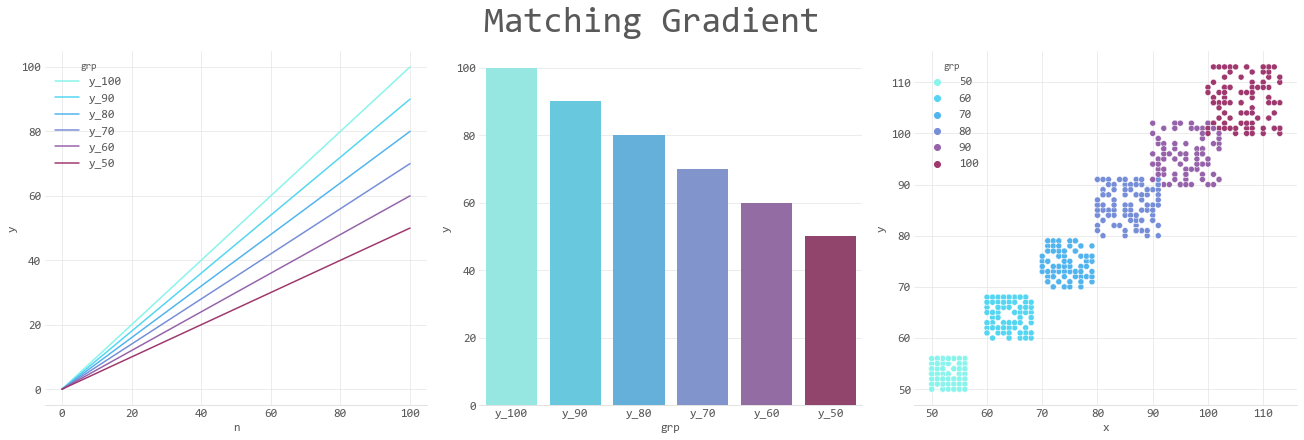

In [134]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

# viz + test data
def viz(p):

    # variables
    c = palettes[p]
    l = len(c)
    y_end = 100
    y_bgn = y_end - ((l*10)-10)
    y_values = np.arange(y_bgn,y_end+1,10)[::-1]
    
    # graph data
    df = pd.DataFrame()
    for y in y_values:
        m = 1.01
        values = np.arange(0, y*m, y*(m-1))
        ttl = f'y_{str(y)}'
        df[ttl] = values.tolist()
        
    df['n'] = df.index
    df_line = df.melt(id_vars='n', var_name='grp', value_name='y')
    df_bar = df[-1:].melt(id_vars='n', var_name='grp', value_name='y')
    
    grp = []
    for n in range(100):
        for y in y_values:
            grp.append(y)
        
    df_sct = pd.DataFrame({'grp':grp})
    df_sct['x'] = np.random.randint(df_sct['grp'], df_sct['grp']*1.15)
    df_sct['y'] = np.random.randint(df_sct['grp'], df_sct['grp']*1.15)
    
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
    sns.lineplot(ax=ax1, data=df_line, x='n', y='y', hue='grp', palette=c)
    sns.barplot(ax=ax2, data=df_bar, x='grp', y='y', palette=c)
    sns.scatterplot(ax=ax3, data=df_sct, x='x', y='y', hue='grp', palette=c)
    fig.suptitle(f'{p}')

# run
p = 'Matching Gradient'
viz(p)

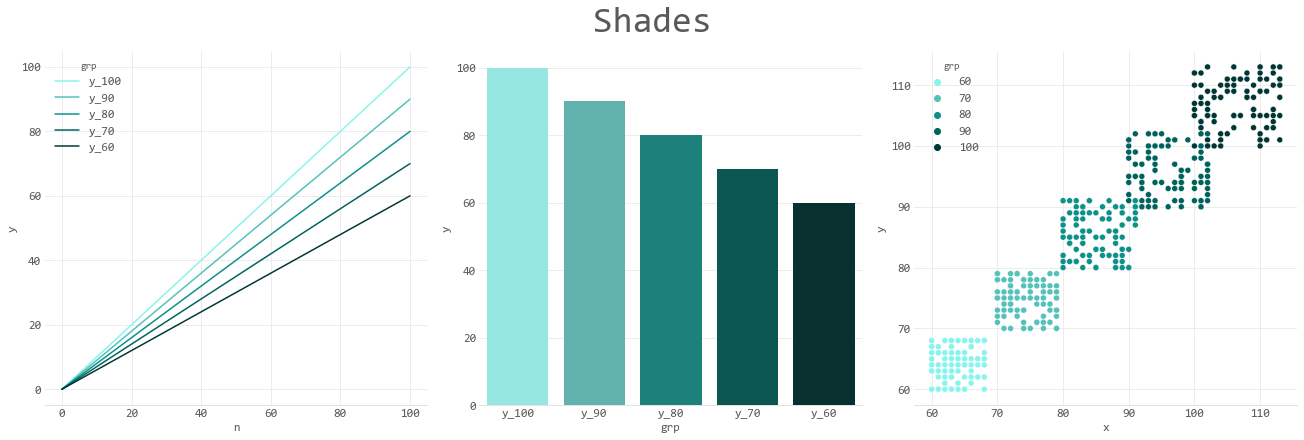

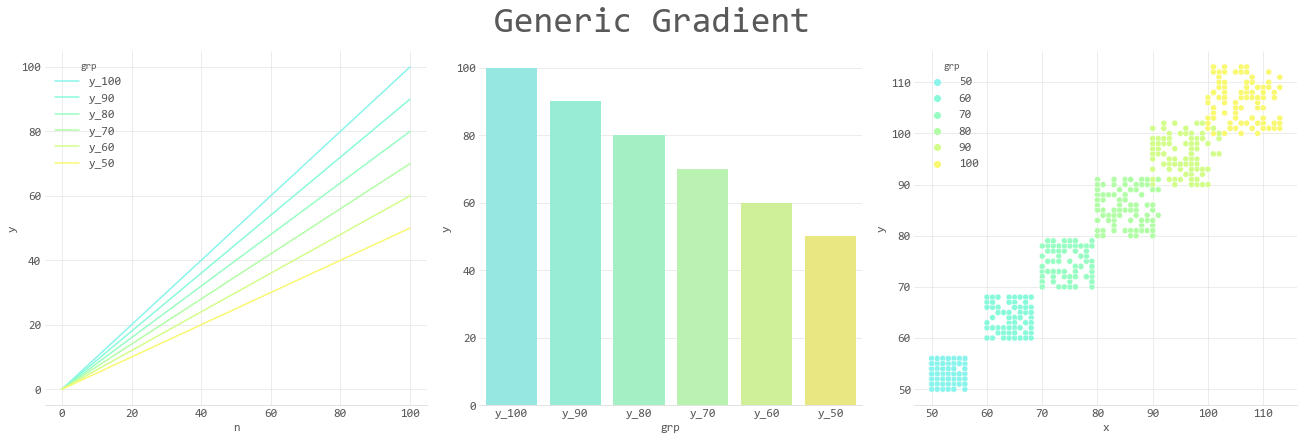

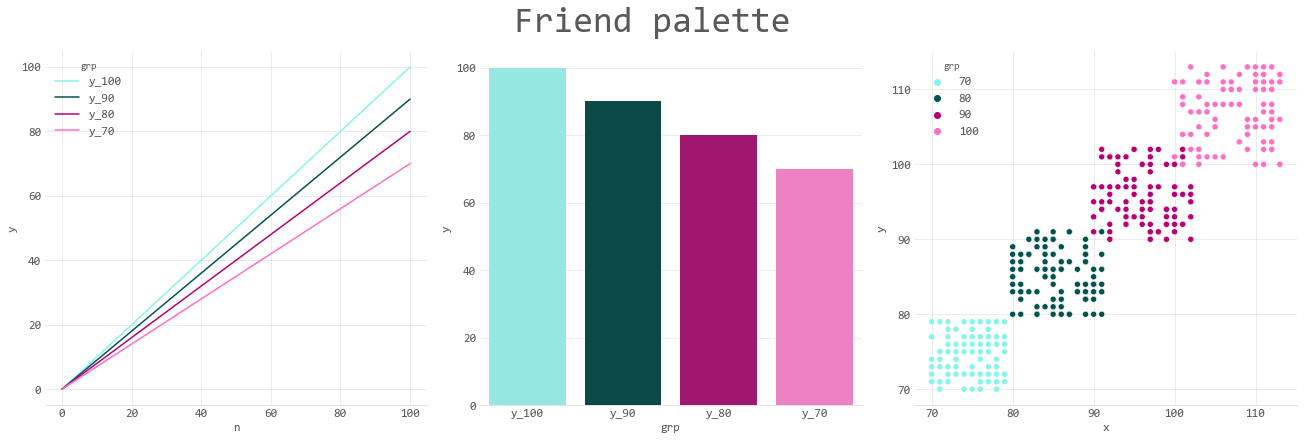

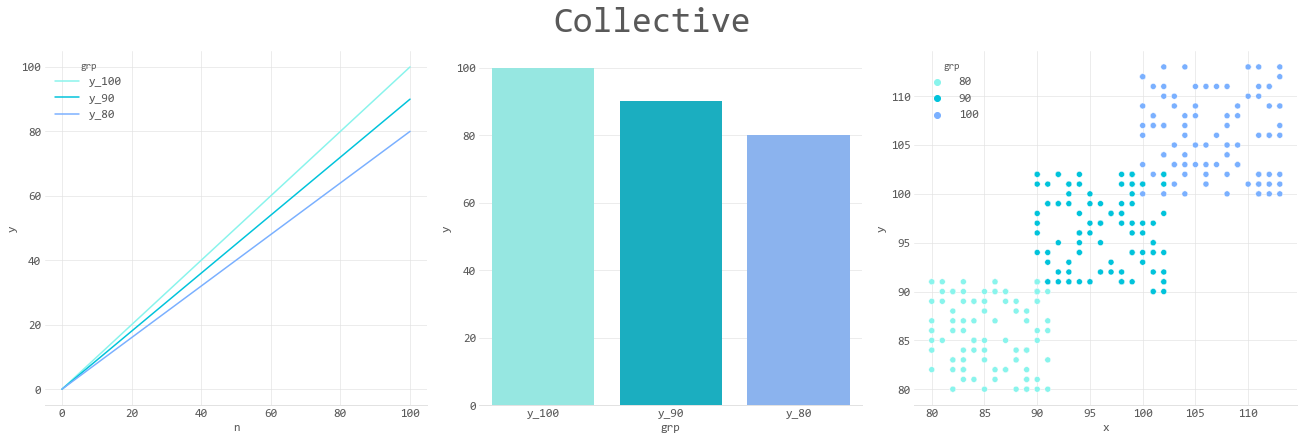

In [135]:
# run
palette_tests = ['Shades', 'Generic Gradient', 'Friend palette', 'Collective']
for p in palette_tests:
    viz(p)